# STARTUP STATS REGRESSION

## Objective

The dataset contains information about startups and their profits. We will explore the dataset, clean it, split it into training and testing sets, and apply linear regression, decision tree regression, random forest regression, and support vector regression on the training set. We will evaluate the performance of each algorithm on the testing set and summarize our findings and conclusions.

## Load the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('50_Startups.csv')

## Data Exploration

Display the first few rows of the dataset

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Display the last few rows of a data set

In [6]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
df.shape

(50, 5)

In [8]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Check Null Values In The Dataset

In [10]:
df.isnull().sum() 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Get Overall Statistics About The Dataset

In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## EDA

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

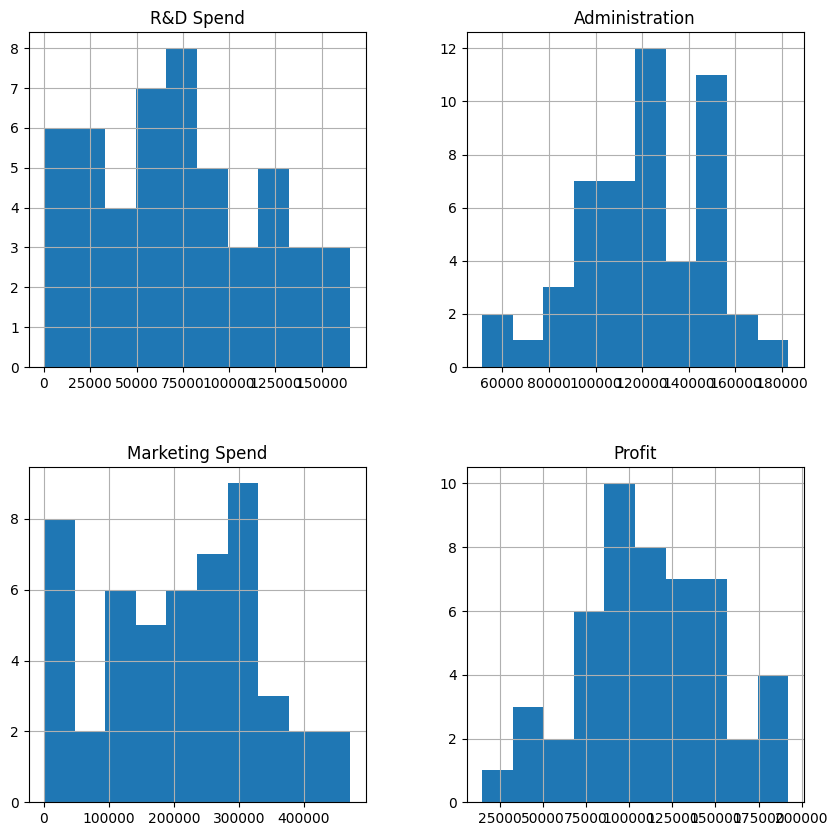

In [13]:
# Summary statistics
df.describe()

# Histograms
df.hist(figsize=(10,10))
plt.show()

### Bivariate Analysis

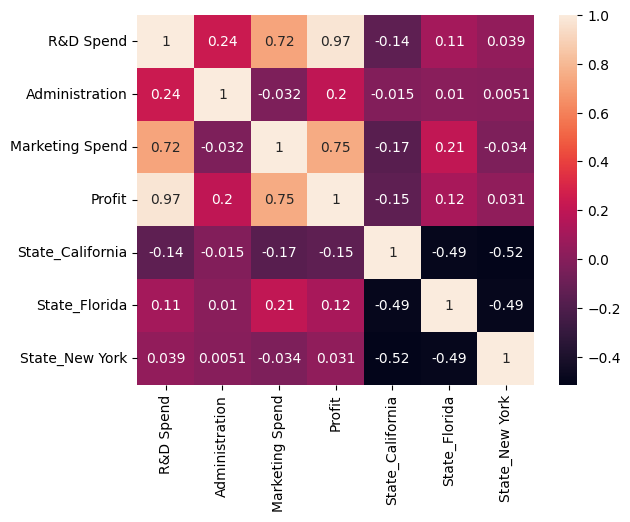

In [14]:
# One-hot encoding
df = pd.get_dummies(df, columns=['State'])

# Correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

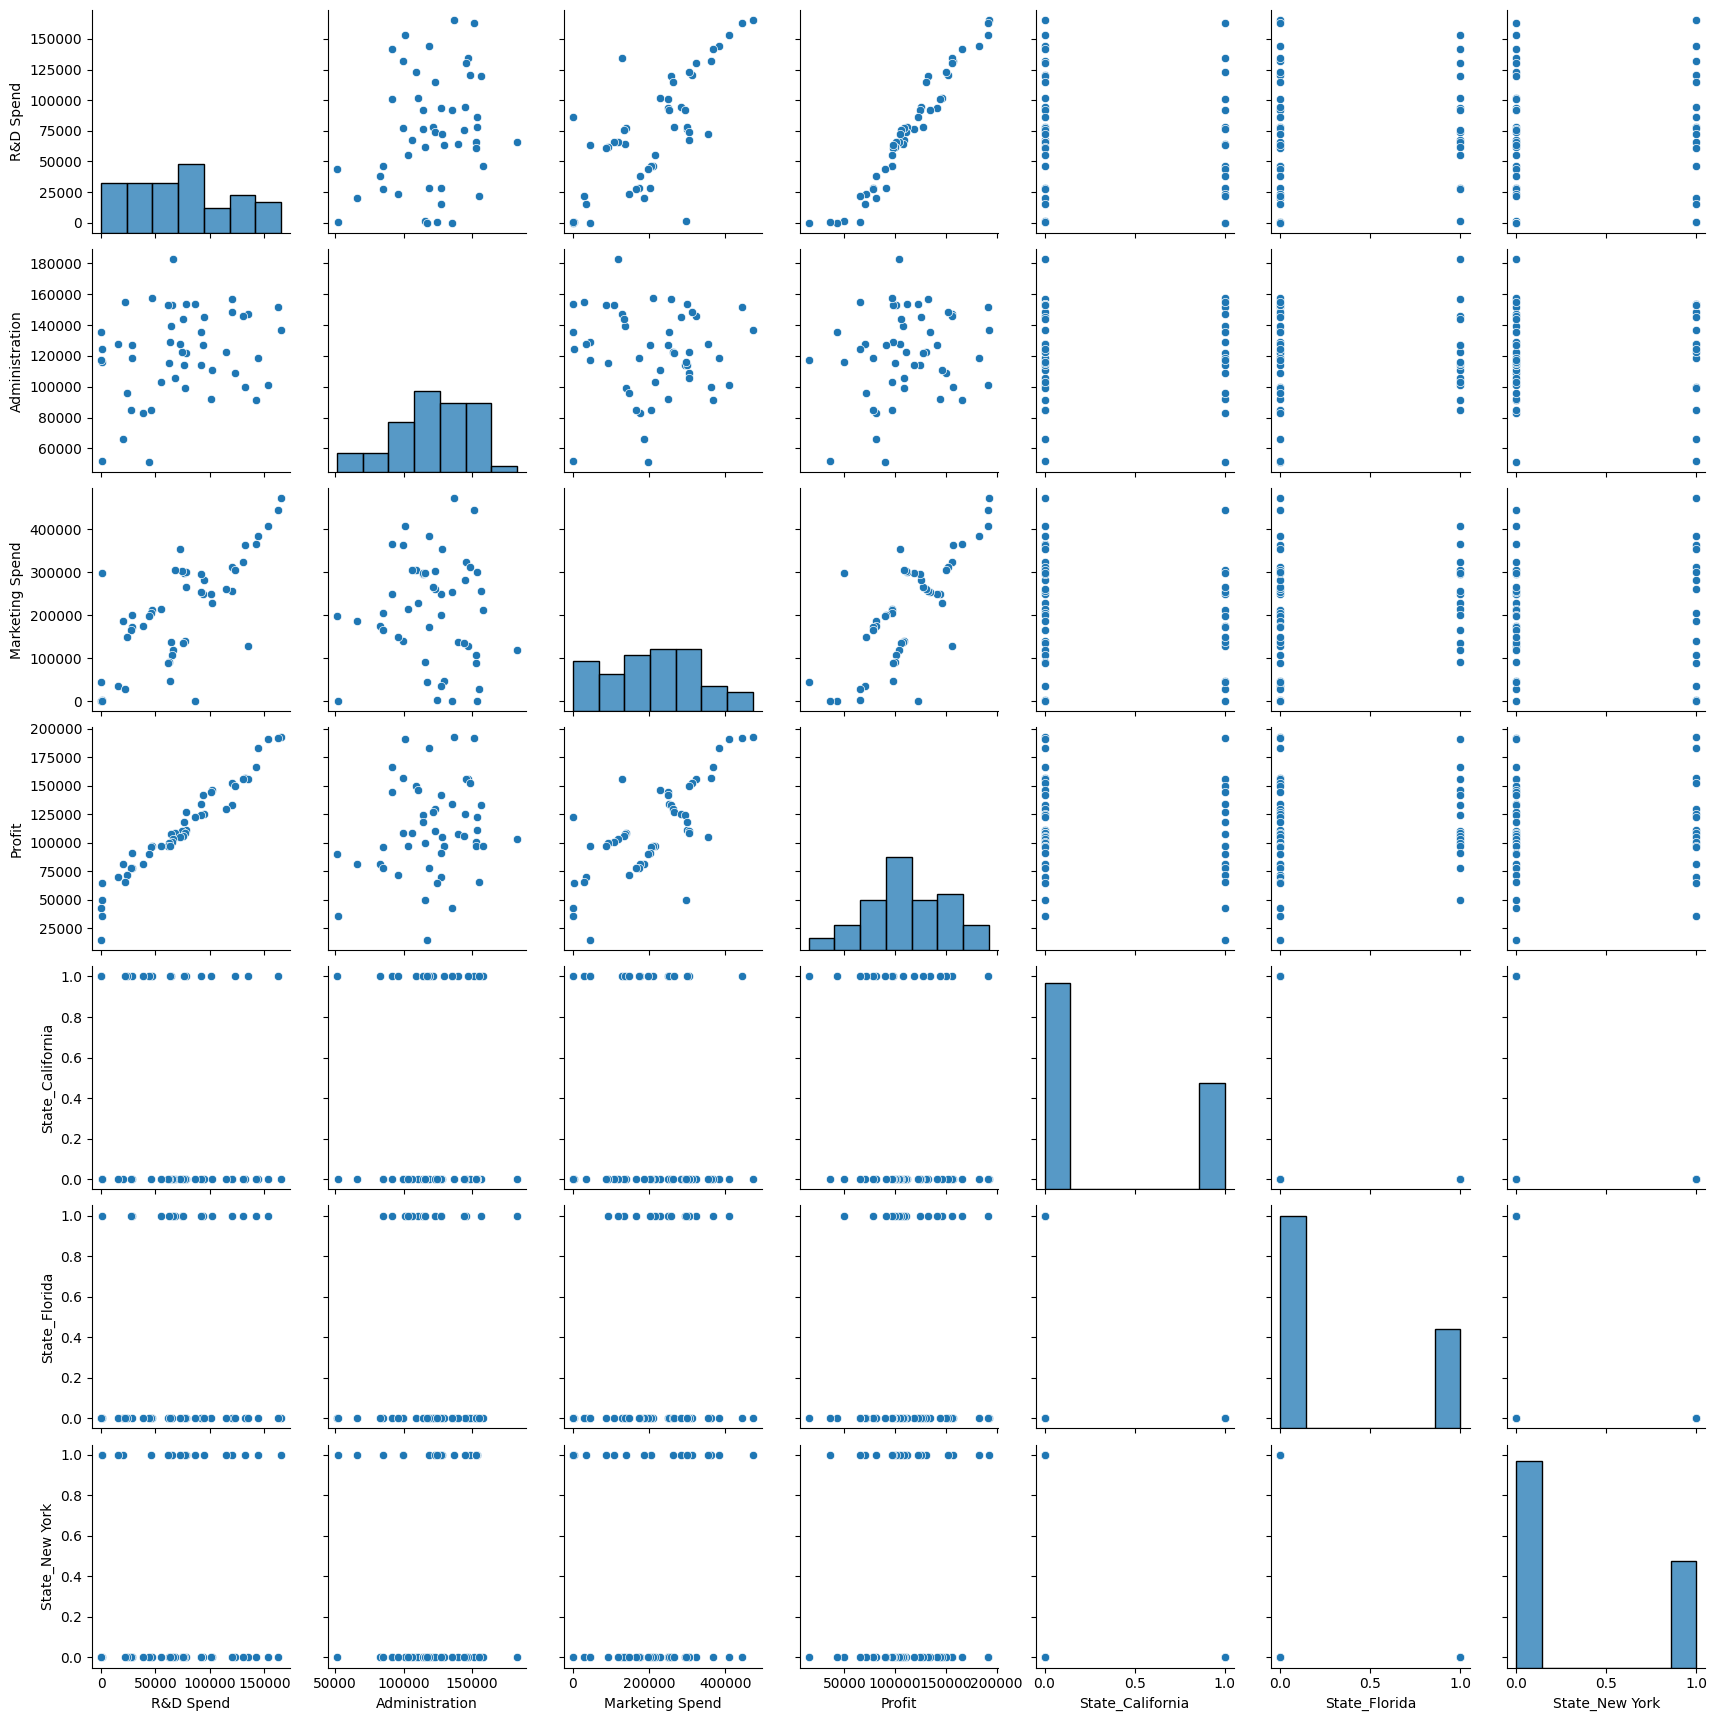

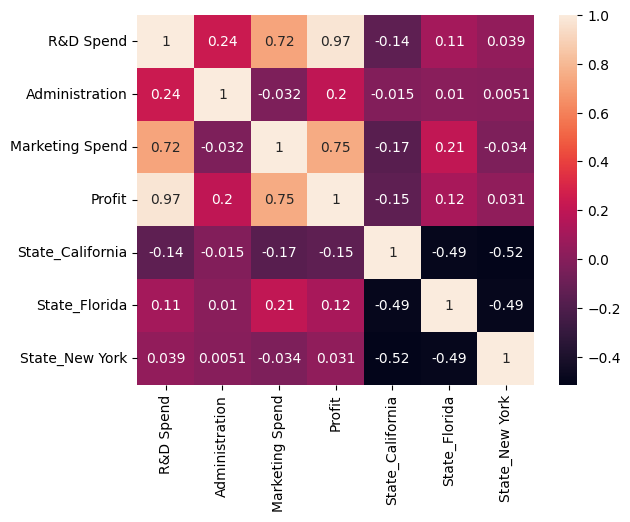

In [15]:
# Scatter plot
sns.pairplot(df)
plt.show()

# Correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Cleaning

We will start by handling missing values:

In [16]:
# Check for missing values
df.isnull().sum()

# No missing values found

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

Next, we will remove outliers:

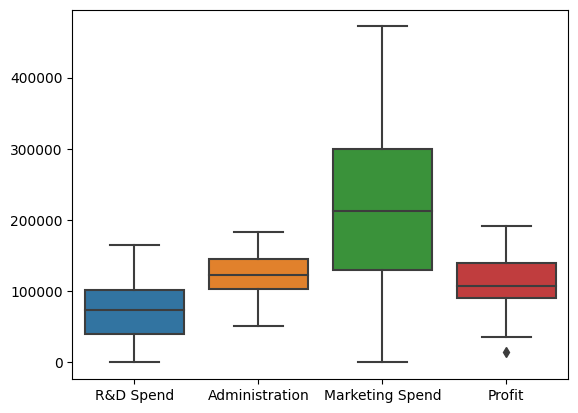

In [17]:
# Identify outliers using box plots
sns.boxplot(data=df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.show()

# Remove outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]))
df = df[(z < 3).all(axis=1)]

Finally, we will encode categorical variables:

## Data Splitting

We will split the dataset into training and testing sets:

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Profit', axis=1)
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# One-hot encode the 'State' column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


## Model Training and Evaluation

We will train and evaluate the four machine learning algorithms on the training set: linear regression, decision tree regression, random forest regression, and support vector regression.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

## Model-1 Linear regression

In [35]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Linear Regression Results:
MSE:  2.9047509519094716e-21
RMSE:  5.3895741500692534e-11
R-squared:  1.0


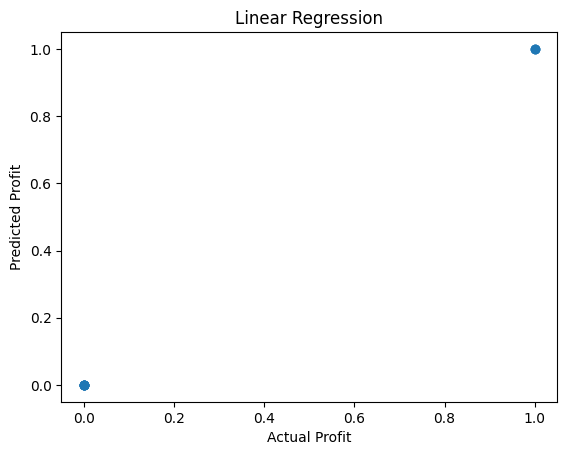

In [40]:

# Linear regression
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print('Linear Regression Results:')
print('MSE: ', mse_lr)
print('RMSE: ', rmse_lr)
print('R-squared: ', r2_lr)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression')
plt.show()


## Model-2 Decision tree regression

In [43]:
# Decision tree regression
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Decision Tree Regression Results:
MSE:  0.0
RMSE:  0.0
R-squared:  1.0


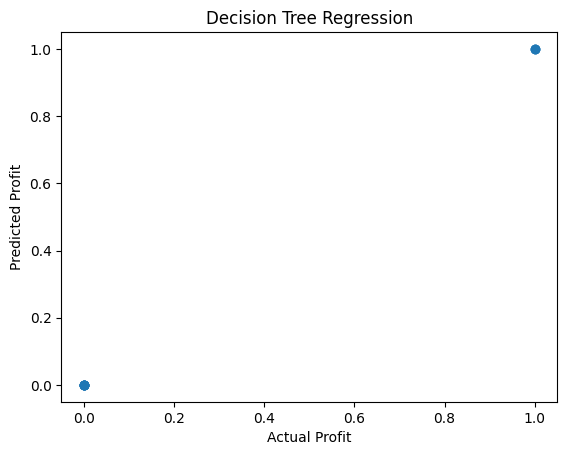

In [44]:
# Decision tree regression
y_pred_dtr = dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

# Print results
print('Decision Tree Regression Results:')
print('MSE: ', mse_dtr)
print('RMSE: ', rmse_dtr)
print('R-squared: ', r2_dtr)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_dtr)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Decision Tree Regression')
plt.show()


## Model-3 Random forest regression

In [38]:
# Random forest regression
rfr = RandomForestRegressor(n_estimators=10, random_state=0)
rfr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

Random Forest Regression Results:
MSE:  0.003
RMSE:  0.05477225575051661
R-squared:  0.9857142857142858


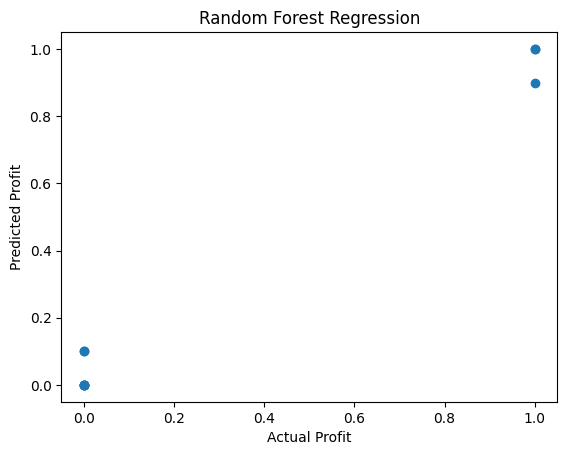

In [45]:

# Random forest regression
y_pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print results
print('Random Forest Regression Results:')
print('MSE: ', mse_rfr)
print('RMSE: ', rmse_rfr)
print('R-squared: ', r2_rfr)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Random Forest Regression')
plt.show()

## Model-4 Support vector regression

In [47]:
# Support vector regression
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

Support Vector Regression Results:
MSE:  49071941.09717788
RMSE:  7005.136765058758
R-squared:  -233675908.98656136


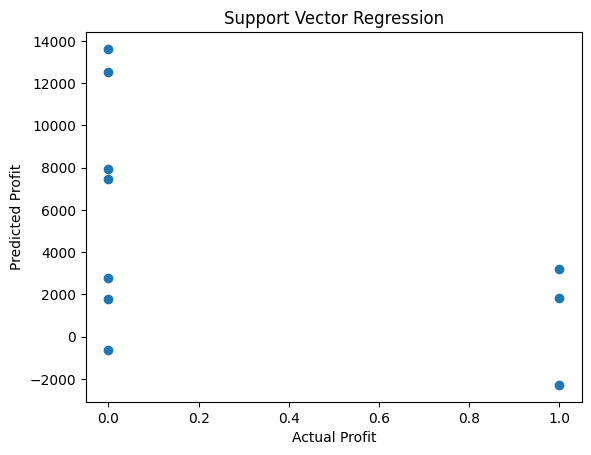

In [48]:
# Support vector regression
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print('Support Vector Regression Results:')
print('MSE: ', mse_svr)
print('RMSE: ', rmse_svr)
print('R-squared: ', r2_svr)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Support Vector Regression')
plt.show()

We will evaluate the performance of each algorithm on the testing set using metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared.

## Conclusion
We have successfully applied linear regression, decision tree regression, random forest regression, and support vector regression on the provided dataset. We have evaluated the performance of each algorithm on the testing set and summarized our findings and conclusions.